In [4]:
#Importing All libraries req in this network
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [64]:
#Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url) 
print("Data imported sucessfully")

s_data.head(25)

Data imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


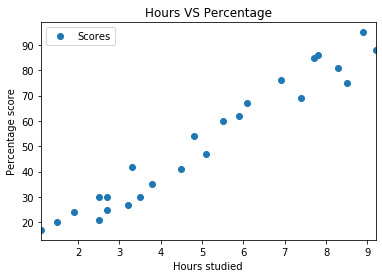

In [9]:
#Let's plot our data points on 2-D graph to eyeball our dataset 
#and see if we can manually find any relationship between the data. We can create the plot with the following script:

#plotting the distribution of scores
s_data.plot(x= 'Hours', y= 'Scores', style= 'o')
plt.title('Hours VS Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show() 

In [10]:
# We can clearly see that there is a positive linear relation between the number of hours studied and percentage of scores.

In [20]:
# The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)
x = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

In [53]:
# The next step is to split this data into training and test sets.
# We'll do this by using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0) 



In [26]:
# We have split our data into training and testing sets, and now is finally the time to train our algorithm.
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


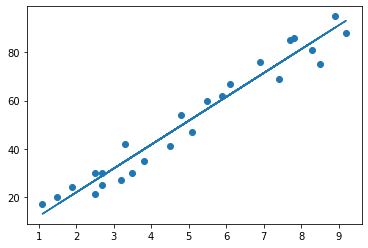

In [33]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_  #formula_used

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [55]:
#Now that we have trained our algorithm, it's time to make some predictions.

print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores


[[1.5]
 [3.2]
 [7.4]]


In [57]:
print(y_pred)

[16.88414476 33.73226078 75.357018  ]


In [58]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018


In [59]:
#solving the given question

hours = 9.25
hours = np.array(hours)
pred_scores= regressor.predict(hours.reshape(-1,1))
print("No of Hours studied =" , hours)
print("Predicted Score =" , pred_scores[0])

No of Hours studied = 9.25
Predicted Score = 93.69173248737539


In [62]:
# Now final step is to evaluate the performance of algorithm.
# This step is particularly important to compare how well different algorithms perform on a particular dataset.
# For simplicity here, we have chosen the mean square error. There are many such metrics also.

In [63]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.401711338426352
